### Import relevant libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error

### Load the dataset

In [8]:
%cd /content/drive/MyDrive/python_for_business_and_finance/Random_Forest_for_income_prediction

df = pd.read_csv("marketing_campaign.csv")
df.head()

/content/drive/MyDrive/python_for_business_and_finance/Random_Forest_for_income_prediction


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,3,6,5,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

### Data cleaning and preparation

In [9]:
# Remove unnecessary columns
df.drop(columns = ["Unnamed: 0", "ID", "Recency", "Dt_Customer"], inplace = True)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,635,88,546,172,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,11,1,6,2,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,426,49,127,111,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,11,4,20,10,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,173,43,118,46,...,3,6,5,0,0,0,0,0,0,0


In [10]:
# Transform Year_Birth column into age
df["Year_Birth"]  = 2000 - df['Year_Birth']

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,43,Graduation,Single,58138.0,0,0,635,88,546,172,...,10,4,7,0,0,0,0,0,0,1
1,46,Graduation,Single,46344.0,1,1,11,1,6,2,...,1,2,5,0,0,0,0,0,0,0
2,35,Graduation,Together,71613.0,0,0,426,49,127,111,...,2,10,4,0,0,0,0,0,0,0
3,16,Graduation,Together,26646.0,1,0,11,4,20,10,...,0,4,6,0,0,0,0,0,0,0
4,19,PhD,Married,58293.0,1,0,173,43,118,46,...,3,6,5,0,0,0,0,0,0,0


In [11]:
# Rename Year_Birth column
df = df.rename(columns = {"Year_Birth":"Age"})
df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,43,Graduation,Single,58138.0,0,0,635,88,546,172,...,10,4,7,0,0,0,0,0,0,1
1,46,Graduation,Single,46344.0,1,1,11,1,6,2,...,1,2,5,0,0,0,0,0,0,0
2,35,Graduation,Together,71613.0,0,0,426,49,127,111,...,2,10,4,0,0,0,0,0,0,0
3,16,Graduation,Together,26646.0,1,0,11,4,20,10,...,0,4,6,0,0,0,0,0,0,0
4,19,PhD,Married,58293.0,1,0,173,43,118,46,...,3,6,5,0,0,0,0,0,0,0


In [12]:
# One-hot encoding categorical columns
df = pd.get_dummies(df, drop_first = True)
df.head()

,Age,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,43,58138.0,0,0,635,88,546,172,88,88,...,1,0,0,0,0,0,1,0,0,0
1,46,46344.0,1,1,11,1,6,2,1,6,...,1,0,0,0,0,0,1,0,0,0
2,35,71613.0,0,0,426,49,127,111,21,42,...,1,0,0,0,0,0,0,1,0,0
3,16,26646.0,1,0,11,4,20,10,3,5,...,1,0,0,0,0,0,0,1,0,0
4,19,58293.0,1,0,173,43,118,46,27,15,...,0,0,1,0,0,1,0,0,0,0


In [13]:
# Check for missing values
df.isna().sum()

Age                         0
Income                     24
Kidhome                     0
Teenhome                    0
MntWines                    0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Response                    0
Education_Basic             0
Education_Graduation        0
Education_Master            0
Education_PhD               0
Marital_Status_Alone        0
Marital_Status_Divorced     0
Marital_Status_Married      0
Marital_Status_Single       0
Marital_Status_Together     0
Marital_Status_Widow        0
Marital_Status_YOLO         0
dtype: int

In [15]:
# Remove missing values
df.dropna(inplace = True)
df.isna().sum()

Age                        0
Income                     0
Kidhome                    0
Teenhome                   0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Response                   0
Education_Basic            0
Education_Graduation       0
Education_Master           0
Education_PhD              0
Marital_Status_Alone       0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Marital_Status_YOLO        0
dtype: int64

In [17]:
# Define X and y variables
y = df['Income']
X = df.drop("Income", axis = 1)

In [21]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Create and train random forest model

In [27]:
model = RandomForestRegressor(n_estimators = 300)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

### Model evaluation using Mean Absolute Error

In [28]:
predictions = model.predict(X_test)

error = mean_absolute_error(y_test, predictions)
print(round(error, 2), round(y_test.mean()))

5622.35 52663


### Feature importance

In [32]:
importances = model.feature_importances_
# print(importances)
importances = pd.Series(data = importances, index = X.columns).sort_values(ascending = False)
print(importances)

MntWines                   0.454701
MntMeatProducts            0.134314
MntFruits                  0.095836
NumDealsPurchases          0.084714
NumWebVisitsMonth          0.079475
MntSweetProducts           0.019316
MntFishProducts            0.018425
MntGoldProds               0.018181
NumWebPurchases            0.017717
Age                        0.016308
NumCatalogPurchases        0.013147
NumStorePurchases          0.012191
Teenhome                   0.007607
AcceptedCmp5               0.007219
Marital_Status_Together    0.004569
Kidhome                    0.003916
Marital_Status_Married     0.002475
Education_Graduation       0.001740
Marital_Status_Single      0.001600
Marital_Status_Divorced    0.001362
Education_PhD              0.001237
Education_Master           0.000857
AcceptedCmp1               0.000816
Response                   0.000590
AcceptedCmp3               0.000461
Marital_Status_Widow       0.000409
AcceptedCmp4               0.000394
Education_Basic            0

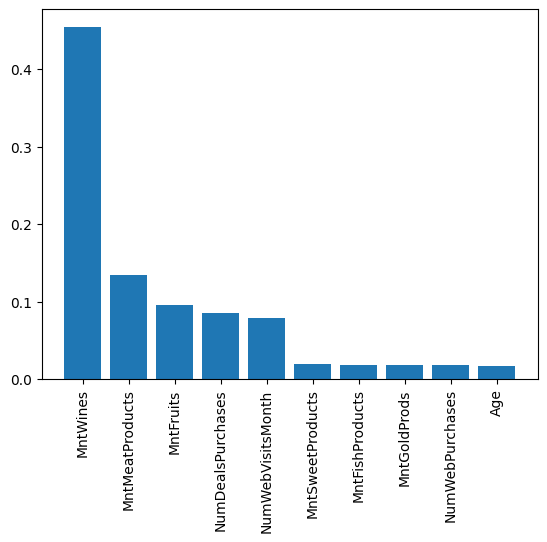

In [34]:
# Plot 10 most important features
plt.bar(height = importances[:10], x = importances.index[:10])
plt.xticks(rotation = 90)
plt.show()

### Parameter tuning

In [ ]:
param_grid = {"n_estimators":[100, 200, 300, 400, 500],
              "min_samples_split":[1, 2, 4, 8],
              "max_depth":[None, 2, 4, 8, 16]}

gs = GridSearchCV(estimator = RandomForestRegressor(),
                  param_grid = param_grid,
                  scoring = mean_absolute_error,
                  cv = 5)
gs.fit(X_train, y_train)

In [ ]:
# Best params
gs.best_params_

In [ ]:
# Best score
gs.best_score_